# Imported Libraries

In [1]:
# 1-Import Libraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import plotly.express as px
import plotly.graph_objs as go

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (16, 9)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


from termcolor import cprint
from ydata_profiling import ProfileReport

import time, warnings
import datetime as dt


#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE

In [2]:
# pip install ydata-profiling

# User-Defined Functions

## Return missing values and their percentages

In [3]:
def check_missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

# Reading the data

In [4]:
df0 = pd.read_csv('OnlineRetail.csv', encoding='latin1')
#df0=pd.read_excel("/content/Online Retail.xlsx")
df = df0.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


In [5]:
df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


# Data exploration and cleaning

## Profile Report

In [6]:
# df_report =df
# profile = ProfileReport(df_report, title="Pandas Profiling Report")

In [7]:
# profile
# profile.to_widgets()
# profile.to_notebook_iframe()

In [8]:
print("Number of transactions: ", df['invoiceno'].nunique())
print("Number of products bought: ",df['stockcode'].nunique())
print("Number of customers:", df['customerid'].nunique() )
print("Percentage of customers NA: ", round(df['customerid'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


In [9]:
df.describe()

,quantity,unitprice,customerid
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


## Dealing with missing values

In [10]:
check_missing_values(df)

,Missing_Number,Missing_Percent
customerid,135080,0.25
description,1454,0.00


<Figure size 720x360 with 0 Axes>

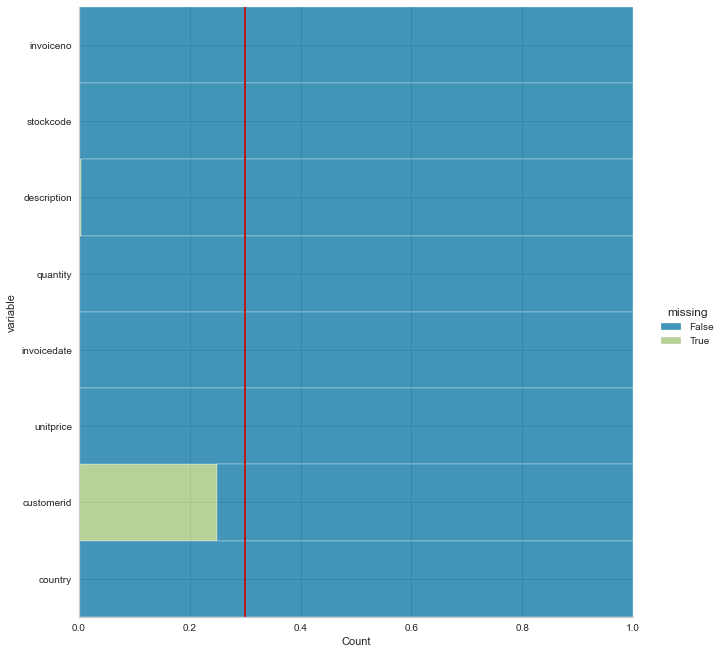

In [11]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r");

In [12]:
df = df.dropna(subset=["customerid"])
df.shape

(406829, 8)

<Figure size 720x360 with 0 Axes>

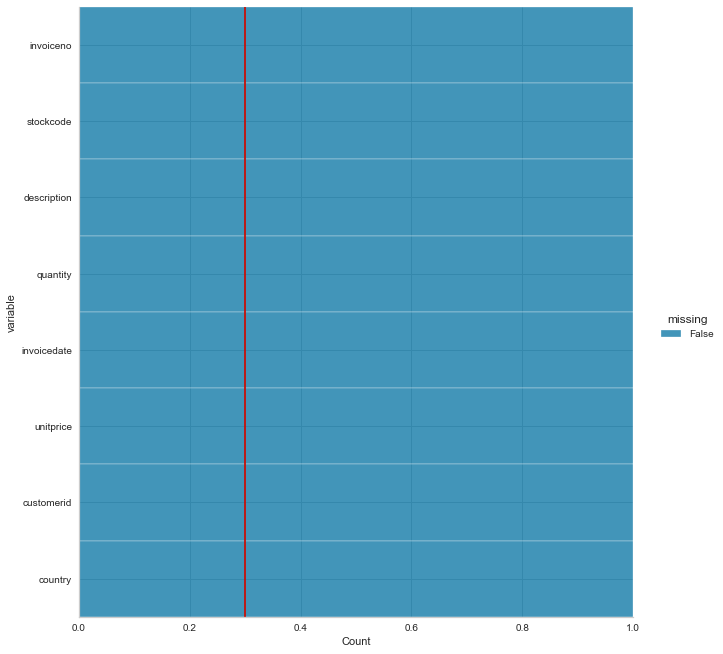

In [13]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r");

## Handling Noise

### Removing Duplicated Records

In [14]:
print("There are", df.duplicated(subset=None, keep='first').sum(), "duplicated observations in the dataset.")
print(df.duplicated(subset=None, keep='first').sum(), "Duplicated observations are dropped!")
df.drop_duplicates(keep='first', inplace=True)

There are 5225 duplicated observations in the dataset.
5225 Duplicated observations are dropped!


In [15]:
df.shape

(401604, 8)

In [16]:
df = df[df['description'] != 'Adjust bad debt']

In [17]:
df.shape

(401604, 8)

From the profile report and df.describe() we noticed there is negative data in these columns (quantity and unit-price)
We also noticed when the invoices contain the letter 'C' it indicates Cancelled Orders
We also noticed there is invoices contains the letter 'A' but there were only 3 records and has negative unitprice got removed when we removed duplicates.

Check if any cancelled orders matches non cancelled orders (Takes longtime to run)
Result was there were none matched

In [18]:
# df_check = df

In [19]:
# df_check['Matched'] = False
#
# for index, row in df_check.iterrows():
#     invoice = row['invoiceno']
#     if 'C' in invoice:
#         normal_invoice = invoice.replace('C', '')
#         matched_row = df_check[df_check['invoiceno'] == normal_invoice]
#         if len(matched_row) > 0:
#             df_check.at[index, 'Matched'] = True

In [20]:
# matched_invoices = df_check[df_check['Matched'] == True]['invoiceno'].tolist()

In [21]:
# matched_invoices

(contains) gives the same results as (startswith)

From the profile report and df.describe() we noticed there is negative data in these columns (quantity and unit-price)
We also noticed when the invoice contain the letter C it indicates Cancelled Orders

In [22]:
cancelled_orders = df[df['invoiceno'].astype(str).str.contains('C')]
cancelled_orders.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.00,United Kingdom


In [23]:
cancelled_orders[cancelled_orders['quantity']>0]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country


In [24]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = df['invoiceno'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  8872  cancelled orders.
Percentage of orders canceled: 8872/22190 (39.98%) 


In [25]:
print("There are", cancelled_orders.duplicated(subset=None, keep='first').sum(), "duplicated observations in the dataset.")
print(cancelled_orders.duplicated(subset=None, keep='first').sum(), "Duplicated observations are dropped!")
cancelled_orders.drop_duplicates(keep='first', inplace=True)

There are 0 duplicated observations in the dataset.
0 Duplicated observations are dropped!


Top cancelled products

In [26]:
cancelled_orders.groupby(["stockcode", "description"])[["quantity"]].sum().sort_values(by="quantity", ascending=True)

,,quantity
stockcode,description,
23843,"PAPER CRAFT , LITTLE BIRDIE",-80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,-74494
84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9367
M,Manual,-3995
21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150
...,...,...
85036A,GARDENIA 1 WICK MORRIS BOXED CANDLE,-1
22272,FELTCRAFT DOLL MARIA,-1
21792,CLASSIC FRENCH STYLE BASKET GREEN,-1


### Removing Negative Values

In [27]:
df = df[(df['unitprice'] > 0) & (df['quantity'] > 0)]

In [28]:
df.sample(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
261989,559894,22897,OVEN MITT APPLES DESIGN,2,7/13/2011 12:06,1.45,14159.00,United Kingdom
33755,539294,21391,FRENCH LAVENDER SCENT HEART,3,12/16/2010 16:45,2.10,15532.00,United Kingdom
532031,580982,22066,LOVE HEART TRINKET POT,4,12/6/2011 16:21,0.39,17861.00,United Kingdom
307137,563908,22487,WHITE WOOD GARDEN PLANT LADDER,1,8/21/2011 12:21,9.95,18109.00,United Kingdom
99518,544774,22138,BAKING SET 9 PIECE RETROSPOT,3,2/23/2011 11:32,4.95,17711.00,United Kingdom
428266,573417,23434,3 RAFFIA RIBBONS 50'S CHRISTMAS,10,10/31/2011 8:56,0.79,12581.00,Germany
88156,543777,90011B,BLACK CRYSTAL DROP EARRINGS,1,2/11/2011 16:19,2.95,15406.00,United Kingdom
91306,544091,21361,LOVE LARGE WOOD LETTERS,2,2/16/2011 8:37,12.75,14897.00,United Kingdom
76826,542662,22969,HOMEMADE JAM SCENTED CANDLES,12,1/31/2011 12:10,1.45,18145.00,United Kingdom
232160,557308,22993,SET OF 4 PANTRY JELLY MOULDS,1,6/19/2011 15:13,1.25,16744.00,United Kingdom


In [29]:
df.shape

(392692, 8)

## Exploring Orders

In [30]:
df.groupby("customerid")["invoiceno"].nunique()

customerid
12346.00     1
12347.00     7
12348.00     4
12349.00     1
12350.00     1
            ..
18280.00     1
18281.00     1
18282.00     2
18283.00    16
18287.00     3
Name: invoiceno, Length: 4338, dtype: int64

In [31]:
df['customerid'].nunique()

4338

In [32]:
df["stockcode"].nunique()

3665

In [33]:
df["description"].nunique()

3877

for some reason the number of stock code and description are not the same

In [34]:
df["description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
                                      ... 
GREEN WITH METAL BAG CHARM               1
WHITE WITH METAL BAG CHARM               1
BLUE/NAT SHELL NECKLACE W PENDANT        1
PINK EASTER HENS+FLOWER                  1
PAPER CRAFT , LITTLE BIRDIE              1
Name: description, Length: 3877, dtype: int64

In [35]:
cprint("The Average Number of Unqiue Items By Order")
df.groupby(["invoiceno", "stockcode", "description"])["quantity"].mean()

The Average Number of Unqiue Items By Order


invoiceno  stockcode  description                        
536365     21730      GLASS STAR FROSTED T-LIGHT HOLDER     6.00
           22752      SET 7 BABUSHKA NESTING BOXES          2.00
           71053      WHITE METAL LANTERN                   6.00
           84029E     RED WOOLLY HOTTIE WHITE HEART.        6.00
           84029G     KNITTED UNION FLAG HOT WATER BOTTLE   6.00
                                                            ... 
581587     22730      ALARM CLOCK BAKELIKE IVORY            4.00
           22899      CHILDREN'S APRON DOLLY GIRL           6.00
           23254      CHILDRENS CUTLERY DOLLY GIRL          4.00
           23255      CHILDRENS CUTLERY CIRCUS PARADE       4.00
           23256      CHILDRENS CUTLERY SPACEBOY            4.00
Name: quantity, Length: 387843, dtype: float64

In [36]:
cprint("The Average Number of Unqiue Items By Customer")
df.groupby(["customerid", "stockcode", "description"])["quantity"].mean()

The Average Number of Unqiue Items By Customer


customerid  stockcode  description                        
12346.00    23166      MEDIUM CERAMIC TOP STORAGE JAR        74215.00
12347.00    16008      SMALL FOLDING SCISSOR(POINTED EDGE)      24.00
            17021      NAMASTE SWAGAT INCENSE                   36.00
            20665      RED RETROSPOT PURSE                       6.00
            20719      WOODLAND CHARLOTTE BAG                   10.00
                                                               ...   
18287.00    84920      PINK FLOWER FABRIC PONY                   4.00
            85039A     SET/4 RED MINI ROSE CANDLE IN BOWL       48.00
            85039B     S/4 IVORY MINI ROSE CANDLE IN BOWL       40.00
            85040A     S/4 PINK FLOWER CANDLES IN BOWL          24.00
            85173      SET/6 FROG PRINCE T-LIGHT CANDLES        48.00
Name: quantity, Length: 268398, dtype: float64

In [37]:
df.groupby(['customerid', 'invoiceno', 'stockcode', "description"])['quantity'].mean()

customerid  invoiceno  stockcode  description                        
12346.00    541431     23166      MEDIUM CERAMIC TOP STORAGE JAR        74215.00
12347.00    537626     20780      BLACK EAR MUFF HEADPHONES                12.00
                       20782      CAMOUFLAGE EAR MUFF HEADPHONES            6.00
                       21064      BOOM BOX SPEAKER BOYS                     6.00
                       21171      BATHROOM METAL SIGN                      12.00
                                                                          ...   
18287.00    570715     85039B     S/4 IVORY MINI ROSE CANDLE IN BOWL       48.00
                       85173      SET/6 FROG PRINCE T-LIGHT CANDLES        48.00
            573167     21014      SWISS CHALET TREE DECORATION             24.00
                       21824      PAINTED METAL STAR WITH HOLLY BELLS      48.00
                       23264      SET OF 3 WOODEN SLEIGH DECORATIONS       36.00
Name: quantity, Length: 387843, dtype: 

## Exploring by country

Calculating total price

In [38]:
df['total_price'] = df['quantity'] * df['unitprice']
df.head(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34


Total revenue by country

In [39]:
df.groupby("country")[['total_price']].sum().sort_values(by='total_price', ascending=False)

,total_price
country,
United Kingdom,7285024.64
Netherlands,285446.34
EIRE,265262.46
Germany,228678.40
France,208934.31
Australia,138453.81
Spain,61558.56
Switzerland,56443.95
Belgium,41196.34


Number of customers by country

In [40]:
customer_num = df.groupby("country")['customerid'].nunique().sort_values(ascending=False)
customer_num

country
United Kingdom          3920
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Czech Republic             1
Lithuania                  1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

In [41]:
customer_num.sum()

4346

In [42]:
df.groupby("customerid")['country'].nunique().sum()

4346

In [43]:
df['customerid'].nunique()

4338

In [44]:
df.groupby('customerid')['country'].nunique().value_counts()

1    4330
2       8
Name: country, dtype: int64

In [45]:
df_graph1 = df.groupby('country')["customerid"].nunique().sort_values(ascending=False)
fig = px.bar(x=df_graph1.index,
             y=df_graph1,
             title="Customers By Countries",
             labels=dict(x="Countries", y="Frequency"))
fig.show()

In [46]:
df_graph1

country
United Kingdom          3920
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Czech Republic             1
Lithuania                  1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

In [47]:
df_graph1_no_uk = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).iloc[1:]
fig = px.bar(x=df_graph1_no_uk.index,
             y=df_graph1_no_uk,
             title="Customers By Countries Excluding The UK",
             labels=dict(x="Countries", y="Frequency"))

fig.show()

In [48]:
df_graph1_no_uk

country
Germany                 94
France                  87
Spain                   30
Belgium                 25
Switzerland             21
Portugal                19
Italy                   14
Finland                 12
Austria                 11
Norway                  10
Netherlands              9
Australia                9
Denmark                  9
Channel Islands          9
Cyprus                   8
Sweden                   8
Japan                    8
Poland                   6
USA                      4
Canada                   4
Unspecified              4
Greece                   4
EIRE                     3
Israel                   3
Malta                    2
United Arab Emirates     2
Bahrain                  2
Czech Republic           1
Lithuania                1
Lebanon                  1
RSA                      1
Saudi Arabia             1
Singapore                1
Iceland                  1
Brazil                   1
European Community       1
Name: customerid, dt

In [49]:
fig = px.treemap(df_graph1, path=[df_graph1.index], values='customerid', width=950, height=600)
fig.update_layout(title_text='Customers By Countries',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [50]:
df_graph2 = df.groupby('country')["total_price"].sum().sort_values(ascending=False)
fig = px.bar(x=df_graph2.index,
             y=df_graph2,
             title="Total Revenue (£) By Countries",
             labels=dict(x="Countries", y="Total Revenue (£)"))

fig.show()

In [51]:
df_graph2

country
United Kingdom         7285024.64
Netherlands             285446.34
EIRE                    265262.46
Germany                 228678.40
France                  208934.31
Australia               138453.81
Spain                    61558.56
Switzerland              56443.95
Belgium                  41196.34
Sweden                   38367.83
Japan                    37416.37
Norway                   36165.44
Portugal                 33375.84
Finland                  22546.08
Singapore                21279.29
Channel Islands          20440.54
Denmark                  18955.34
Italy                    17483.24
Cyprus                   13502.85
Austria                  10198.68
Poland                    7334.65
Israel                    7215.84
Greece                    4760.52
Iceland                   4310.00
Canada                    3666.38
USA                       3580.39
Malta                     2725.59
Unspecified               2660.77
United Arab Emirates      1902.28
Lebano

In [52]:
fig = px.treemap(df_graph2, path=[df_graph2.index], values='total_price', width=950, height=600)
fig.update_layout(title_text='Total Revenue (£) By Countries',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

UK has the highest revenue by alot and also the most customers, that's why we will only focus on uk market

## UK Dataset

In [53]:
df_uk = df[df["country"]=="United Kingdom"]
df_uk.head(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34


Top products

In [54]:
df_uk.groupby(["stockcode", "description"])[["quantity"]].sum().sort_values(by="quantity", ascending=False)

,,quantity
stockcode,description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,76919
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086
85099B,JUMBO BAG RED RETROSPOT,41878
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34630
...,...,...
90025F,BAROQUE BUTTERFLY EARRINGS CRYSTAL,1
20667,CHERRY BLOSSOM PURSE,1
90065B,BLACK VINT ART DEC CRYSTAL BRACELET,1


In [55]:
df_uk

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.00,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.00,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.00,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.00,United Kingdom,214.80


In [56]:
print("Summary..")
#exploring the unique values of each attribute
print("Number of transactions: ", df_uk['invoiceno'].nunique())
print("Number of products bought: ",df_uk['stockcode'].nunique())
print("Number of customers:", df_uk['customerid'].nunique() )
print("Percentage of customers NA: ", round(df_uk['customerid'].isnull().sum() * 100 / len(df),2),"%" )

Summary..
Number of transactions:  16646
Number of products bought:  3645
Number of customers: 3920
Percentage of customers NA:  0.0 %


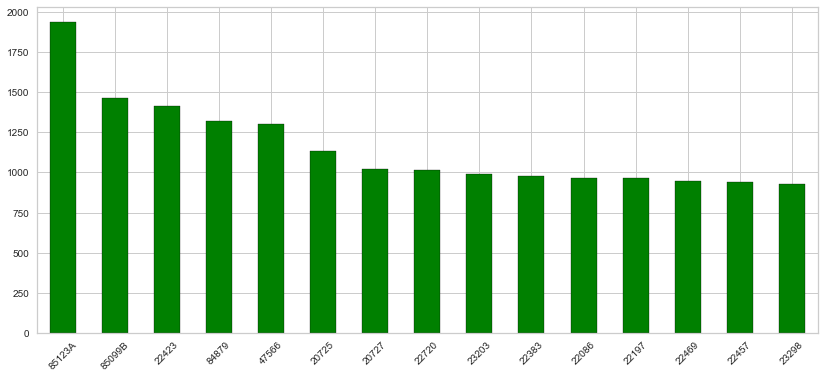

In [57]:
# Top 15 most purchased products.

df_uk["stockcode"].value_counts().head(15).plot(kind="bar", width=0.5, color='green', edgecolor='black', figsize=(14, 6))
plt.xticks(rotation=45);

# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation
technique that uses past purchase behavior to divide customers into groups.

***We will create those 3 customer attributes for each customer

# RECENCY

In [58]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    349203 non-null  object 
 1   stockcode    349203 non-null  object 
 2   description  349203 non-null  object 
 3   quantity     349203 non-null  int64  
 4   invoicedate  349203 non-null  object 
 5   unitprice    349203 non-null  float64
 6   customerid   349203 non-null  float64
 7   country      349203 non-null  object 
 8   total_price  349203 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 26.6+ MB


In [59]:
df_uk['invoicedate'] = pd.to_datetime(df_uk['invoicedate'])

In [60]:
df_uk['invoicedate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541889   2011-12-09 12:31:00
541890   2011-12-09 12:49:00
541891   2011-12-09 12:49:00
541892   2011-12-09 12:49:00
541893   2011-12-09 12:49:00
Name: invoicedate, Length: 349203, dtype: datetime64[ns]

In [61]:
#restrict the data to one full year because it's better to use a metric per Months or Years in RFM
df_uk = df_uk[df_uk['invoicedate']>= "2010-12-09"]
df_uk.shape

(337646, 9)

In [62]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [63]:
#create a new column called date which contains the date of invoice only
df_uk['date'] = df_uk['invoicedate'].dt.date
df_uk['date']

19632     2010-12-09
19633     2010-12-09
19634     2010-12-09
19635     2010-12-09
19636     2010-12-09
             ...    
541889    2011-12-09
541890    2011-12-09
541891    2011-12-09
541892    2011-12-09
541893    2011-12-09
Name: date, Length: 337646, dtype: object

In [64]:
recency_df = df_uk.groupby(by='customerid', as_index=False)['date'].max()
recency_df.columns = ['customerid','LastPurshaceDate']
recency_df.head()

,customerid,LastPurshaceDate
0,12346.00,2011-01-18
1,12747.00,2011-12-07
2,12748.00,2011-12-09
3,12749.00,2011-12-06
4,12820.00,2011-12-06



group by customers and check last date of purshace


In [65]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.head()


,customerid,LastPurshaceDate,Recency
0,12346.00,2011-01-18,325
1,12747.00,2011-12-07,2
2,12748.00,2011-12-09,0
3,12749.00,2011-12-06,3
4,12820.00,2011-12-06,3


when customer did his/her last purshace?


In [66]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

# Frequency

how many times a customer purchased from us.



In [67]:
# drop duplicates
retail_uk_copy = df_uk
retail_uk_copy.drop_duplicates(subset=['invoiceno', 'customerid'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retail_uk_copy.groupby(by=['customerid'], as_index=False)['invoiceno'].count()
frequency_df.columns = ['customerid','Frequency']
frequency_df.head()

,customerid,Frequency
0,12346.00,1
1,12747.00,10
2,12748.00,195
3,12749.00,5
4,12820.00,4


# Monetary
 How much money did the customer spent over time?


 we will create a new column total cost to have the total price per invoice.

In [68]:
#create column total cost
df_uk['TotalCost'] = df_uk['quantity'] * df_uk['unitprice']
# total price per invoice.
monetary_df = df_uk.groupby(by='customerid',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['customerid','Monetary']
monetary_df.head()

,customerid,Monetary
0,12346.00,77183.60
1,12747.00,658.89
2,12748.00,3739.23
3,12749.00,98.35
4,12820.00,58.20


# Create RFM Table


In [69]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='customerid')
temp_df.head()

,customerid,Recency,Frequency
0,12346.00,325,1
1,12747.00,2,10
2,12748.00,0,195
3,12749.00,3,5
4,12820.00,3,4


In [70]:
#merge with monetary dataframe to get a table with the 3 columns
customer_rfm  = temp_df.merge(monetary_df,on='customerid')
#use CustomerID as index
customer_rfm .set_index('customerid',inplace=True)
#check the head
customer_rfm .head()

,Recency,Frequency,Monetary
customerid,,,
12346.00,325,1,77183.60
12747.00,2,10,658.89
12748.00,0,195,3739.23
12749.00,3,5,98.35
12820.00,3,4,58.20


In [71]:
customer_rfm

,Recency,Frequency,Monetary
customerid,,,
12346.00,325,1,77183.60
12747.00,2,10,658.89
12748.00,0,195,3739.23
12749.00,3,5,98.35
12820.00,3,4,58.20
...,...,...,...
18280.00,277,1,23.70
18281.00,180,1,5.04
18282.00,7,2,38.25


In [72]:
#1. Dividing the customer_rfm into quarters
customer_rfm.describe()


,Recency,Frequency,Monetary
count,3862.00,3862.00,3862.00
mean,87.56,4.15,288.38
std,94.19,6.93,3266.99
min,0.00,1.00,0.39
25%,17.00,1.00,17.40
50%,49.00,2.00,45.00
75%,134.00,5.00,121.62
max,365.00,195.00,168471.25


In [73]:
quantiles = customer_rfm.quantile(q = [0.25, 0.50, 0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.00,1.00,17.40
0.50,49.00,2.00,45.00
0.75,134.00,5.00,121.62


# Creating the RFM Segmentation Table




### Recency score

In [74]:
def recency_scoring(rfm):
    if rfm.Recency <= 24.0:
        recency_score = 4
    elif rfm.Recency <= 57.0:
        recency_score = 3
    elif rfm.Recency <= 149.0:
        recency_score = 2
    else:
        recency_score = 1
    return recency_score

customer_rfm['Recency_Score'] = customer_rfm.apply(recency_scoring, axis=1)
customer_rfm.sample(10)

,Recency,Frequency,Monetary,Recency_Score
customerid,,,,
16017.00,47,1,9.90,3
17221.00,7,2,10.80,4
17693.00,137,1,15.00,2
14997.00,46,3,43.08,3
17420.00,50,2,40.70,3
15424.00,254,2,48.72,1
13506.00,316,1,16.80,1
17621.00,21,3,214.08,4
15394.00,9,4,103.00,4


In [75]:
fig = px.pie(df, values = customer_rfm['Recency_Score'].value_counts(),
             names = (customer_rfm["Recency_Score"].value_counts()).index,
             title = 'Recency Score Distribution')
fig.show()


### freconcy score




In [76]:
def frequency_scoring(rfm):
    if rfm.Frequency >= 10.0:
        frequency_score = 4
    elif rfm.Frequency >= 5.0:
        frequency_score = 3
    elif rfm.Frequency >= 2.0:
        frequency_score = 2
    else:
        frequency_score = 1
    return frequency_score

customer_rfm['Frequency_Score'] = customer_rfm.apply(frequency_scoring, axis=1)
customer_rfm.sample(10)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score
customerid,,,,,
17594.00,85,2,67.00,2,2
15857.00,18,1,15.00,4,1
17274.00,35,1,0.83,3,1
16250.00,261,1,8.50,1,1
17279.00,57,1,51.00,3,1
16623.00,245,1,8.85,1,1
13962.00,21,2,35.50,4,2
15518.00,64,8,79.51,2,3
15334.00,156,3,21.54,1,2


In [77]:
fig = px.pie(df, values = customer_rfm['Frequency_Score'].value_counts(),
             names = (customer_rfm["Frequency_Score"].value_counts()).index,
             title = 'Frequency Score Distribution')
fig.show()

### monetary scoring

In [78]:
def monetary_scoring(rfm):
    if rfm.Monetary >= 1571.0:
        monetary_score = 4
    elif rfm.Monetary >= 645.0:
        monetary_score = 3
    elif rfm.Monetary >= 298.0:
        monetary_score = 2
    else:
        monetary_score = 1
    return monetary_score

customer_rfm['Monetary_Score'] = customer_rfm.apply(monetary_scoring, axis=1)
customer_rfm.sample(10)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
customerid,,,,,,
15246.00,238,2,27.90,1,2,1
13743.00,2,7,187.20,4,3,1
17416.00,29,7,488.49,3,3,2
14424.00,17,1,322.08,4,1,2
14913.00,35,4,34.02,3,2,1
18176.00,358,1,15.30,1,1,1
13506.00,316,1,16.80,1,1,1
16401.00,1,12,469.21,4,4,2
17449.00,2,7,65.86,4,3,1


In [79]:
fig = px.pie(df, values = customer_rfm['Monetary_Score'].value_counts(),
             names = (customer_rfm["Monetary_Score"].value_counts()).index,
             title = 'Monetary Score Distribution')
fig.show()

#### Now that scored each customer, you'll combine the scores for segmentation.


In [80]:
def rfm_scoring(customer):
    return str(int(customer['Recency_Score'])) + str(int(customer['Frequency_Score'])) + str(int(customer['Monetary_Score']))


customer_rfm['Customer_RFM_Score'] = customer_rfm.apply(rfm_scoring, axis=1)
customer_rfm.sample(8)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score
customerid,,,,,,,
13417.00,4,2,41.20,4,2,1,421
17222.00,65,1,7.50,2,1,1,211
17430.00,32,2,25.80,3,2,1,321
17917.00,45,3,4.10,3,2,1,321
15334.00,156,3,21.54,1,2,1,121
16863.00,31,1,10.50,3,1,1,311
16647.00,169,2,22.44,1,2,1,121
14184.00,66,1,33.00,2,1,1,211


In [81]:
fig = px.histogram(customer_rfm, x = customer_rfm['Customer_RFM_Score'].value_counts().index,
                   y = customer_rfm['Customer_RFM_Score'].value_counts().values,
                   title = 'Customer RFM Score Distribution',
                   labels = dict(x = "Customer_RFM_Score", y ="counts"))
fig.show()

. Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Label.


In [82]:
customer_rfm['RFM_Label'] = customer_rfm['Recency_Score'] + customer_rfm['Frequency_Score'] + customer_rfm['Monetary_Score']

customer_rfm.sample(8)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,RFM_Label
customerid,,,,,,,,
13988.00,19,6,135.18,4,3,1,431,8
13055.00,78,3,43.08,2,2,1,221,5
13072.00,266,1,15.00,1,1,1,111,3
13097.00,32,10,271.91,3,4,1,341,8
13715.00,281,4,39.09,1,2,1,121,4
17649.00,138,1,15.00,2,1,1,211,4
13607.00,40,1,23.40,3,1,1,311,5
14998.00,170,2,7.85,1,2,1,121,4


In [83]:
customer_rfm[customer_rfm['Customer_RFM_Score']=='214'].head(3)


,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,RFM_Label
customerid,,,,,,,,
17846.00,85,1,2033.10,2,1,4,214,7


In [84]:
customer_rfm.groupby(['Customer_RFM_Score']).size().sort_values(ascending=False)[:]

Customer_RFM_Score
111    593
421    482
221    386
211    343
321    342
431    297
121    244
311    241
411    158
331    144
441    102
442     76
231     69
444     54
443     47
432     43
222     20
341     19
131     18
232     18
422     17
332     13
122     13
342     12
433     11
343      8
234      6
112      6
223      6
323      6
424      4
423      4
434      4
344      4
312      4
241      4
324      3
244      3
233      3
243      3
123      3
212      3
322      3
333      3
141      2
124      2
412      2
114      2
224      2
334      2
143      1
113      1
313      1
134      1
132      1
214      1
414      1
242      1
dtype: int64

In [85]:
customer_rfm[customer_rfm['Customer_RFM_Score']=='444'].head(3)


,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,RFM_Label
customerid,,,,,,,,
12748.00,0,195,3739.23,4,4,4,444,12
12901.00,8,28,9230.45,4,4,4,444,12
12931.00,21,15,4188.98,4,4,4,444,12


###RFM Labels

In [86]:
fig = px.pie(df, values = customer_rfm['RFM_Label'].value_counts(),
             names = (customer_rfm["RFM_Label"].value_counts()).index,
             title = 'RFM Label Distribution')
fig.show()

In [87]:
np.sort(customer_rfm['RFM_Label'].unique())

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [88]:
segments = {'Customer_Segment':['Champion',
                                'Top Loyal Customer',
                                'Loyal Customer',
                                'Top Recent Customer',
                                'Recent Customer',
                                'Top Customer Needed Attention',
                                'Customer Needed Attention',
                                'Top Lost Customer',
                                'Lost Customer'],
            'RFM':['(2|3|4)-(4)-(4)',
                   '(3)-(1|2|3|4)-(3|4)',
                   '(3)-(1|2|3|4)-(1|2)',
                   '(4)-(1|2|3|4)-(3|4)',
                   '(4)-(1|2|3|4)-(1|2)',
                   '(2|3)-(1|2|3|4)-(3|4)',
                   '(2|3)-(1|2|3|4)-(1|2)',
                   '(1)-(1|2|3|4)-(3|4)',
                   '(1)-(1|2|3|4)-(1|2)',]}

pd.DataFrame(segments)

,Customer_Segment,RFM
0,Champion,(2|3|4)-(4)-(4)
1,Top Loyal Customer,(3)-(1|2|3|4)-(3|4)
2,Loyal Customer,(3)-(1|2|3|4)-(1|2)
3,Top Recent Customer,(4)-(1|2|3|4)-(3|4)
4,Recent Customer,(4)-(1|2|3|4)-(1|2)
5,Top Customer Needed Attention,(2|3)-(1|2|3|4)-(3|4)
6,Customer Needed Attention,(2|3)-(1|2|3|4)-(1|2)
7,Top Lost Customer,(1)-(1|2|3|4)-(3|4)
8,Lost Customer,(1)-(1|2|3|4)-(1|2)


In [89]:
def categorizer(rfm):
    if (rfm[0] in ['2', '3', '4']) & (rfm[1] in ['4']) & (rfm[2] in ['4']):
        rfm = 'Champion'

    elif (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Loyal Customer'

    elif (rfm[0] in ['3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Loyal Customer'

    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Recent Customer'

    elif (rfm[0] in ['4']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Recent Customer'

    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Customer Needed Attention'

    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Customer Needed Attention'

    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Top Lost Customer'

    elif (rfm[0] in ['1']) & (rfm[1] in ['1', '2', '3', '4']) & (rfm[2] in ['1', '2']):
        rfm = 'Lost Customer'

    return rfm

In [90]:
customer_rfm['Customer_Category'] = customer_rfm["Customer_RFM_Score"].apply(categorizer)
customer_rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,RFM_Label,Customer_Category
customerid,,,,,,,,,
12346.00,325,1,77183.60,1,1,4,114,6,Top Lost Customer
12747.00,2,10,658.89,4,4,3,443,11,Top Recent Customer
12748.00,0,195,3739.23,4,4,4,444,12,Champion
12749.00,3,5,98.35,4,3,1,431,8,Recent Customer
12820.00,3,4,58.20,4,2,1,421,7,Recent Customer
...,...,...,...,...,...,...,...,...,...
18280.00,277,1,23.70,1,1,1,111,3,Lost Customer
18281.00,180,1,5.04,1,1,1,111,3,Lost Customer
18282.00,7,2,38.25,4,2,1,421,7,Recent Customer


In [91]:
customer_rfm.groupby('Customer_Category').RFM_Label.mean()

Customer_Category
Champion                        11.84
Customer Needed Attention        4.75
Lost Customer                    3.37
Loyal Customer                   6.01
Recent Customer                  7.57
Top Customer Needed Attention    8.10
Top Lost Customer                6.50
Top Loyal Customer               9.09
Top Recent Customer             10.65
Name: RFM_Label, dtype: float64

In [92]:
customer_rfm[customer_rfm['Customer_Category'] == "Top Loyal Customer"].sample(8)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,RFM_Label,Customer_Category
customerid,,,,,,,,,
17865.00,30,20,873.08,3,4,3,343,10,Top Loyal Customer
15301.00,50,11,878.50,3,4,3,343,10,Top Loyal Customer
17262.00,52,4,650.55,3,2,3,323,8,Top Loyal Customer
16751.00,30,1,918.00,3,1,3,313,7,Top Loyal Customer
16308.00,37,4,2560.00,3,2,4,324,9,Top Loyal Customer
16671.00,28,3,1050.39,3,2,3,323,8,Top Loyal Customer
15129.00,50,11,1046.40,3,4,3,343,10,Top Loyal Customer
15291.00,25,14,916.49,3,4,3,343,10,Top Loyal Customer


In [93]:
customer_rfm[customer_rfm['Customer_Category'] == "Lost Customer"].sample(8)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,Customer_RFM_Score,RFM_Label,Customer_Category
customerid,,,,,,,,,
15280.00,172,1,0.72,1,1,1,111,3,Lost Customer
15732.00,212,1,16.50,1,1,1,111,3,Lost Customer
17140.00,247,1,7.50,1,1,1,111,3,Lost Customer
15889.00,156,1,15.90,1,1,1,111,3,Lost Customer
14068.00,320,1,29.50,1,1,1,111,3,Lost Customer
17105.00,159,2,14.30,1,2,1,121,4,Lost Customer
15032.00,256,1,16.50,1,1,1,111,3,Lost Customer
17654.00,277,1,7.50,1,1,1,111,3,Lost Customer


In [94]:
fig = px.histogram(customer_rfm,
                   x = customer_rfm['Customer_Category'].value_counts().index,
                   y = customer_rfm['Customer_Category'].value_counts().values,
                   title = 'Customer Category Distribution',
                   labels = dict(x = "Customer_Category", y ="counts"))
fig.show()

In [95]:
Avg_RFM_Label = customer_rfm.groupby('Customer_Category').RFM_Label.mean()
Size_RFM_Label = customer_rfm['Customer_Category'].value_counts()
df_customer_segmentation = pd.concat([Avg_RFM_Label, Size_RFM_Label], axis=1).rename(columns={'RFM_Label':'Avg_RFM_Label',
                                                                           'Customer_Category':'Size_RFM_Label'})
df_customer_segmentation

,Avg_RFM_Label,Size_RFM_Label
Champion,11.84,61
Customer Needed Attention,4.75,844
Lost Customer,3.37,877
Loyal Customer,6.01,778
Recent Customer,7.57,1177
Top Customer Needed Attention,8.10,21
Top Lost Customer,6.50,10
Top Loyal Customer,9.09,23
Top Recent Customer,10.65,71


In [96]:
fig = px.histogram(customer_rfm,
                   x = customer_rfm.groupby('Customer_Category').RFM_Label.mean().sort_values(ascending=False).index,
                   y = customer_rfm.groupby('Customer_Category').RFM_Label.mean().sort_values(ascending=False).values,
                   title = 'The Average of RFM Label',
                   labels = dict(x = "Customer Segments (Categories)", y ="RFM Label Mean Values"))
fig.show()

In [97]:
fig = px.treemap(df_customer_segmentation,
                 path=[df_customer_segmentation.index],
                 values='Size_RFM_Label',
                 width=950, height=600)

fig.update_layout(title_text='Customer Segmentation',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [98]:
segmentation = pd.DataFrame(customer_rfm.Customer_Category.value_counts(dropna=False).sort_values(ascending=False))
segmentation.reset_index(inplace=True)
segmentation.rename(columns={'index':'Customer Category', 'Customer_Category':'The Number Of Customer'}, inplace=True)
segmentation

,Customer Category,The Number Of Customer
0,Recent Customer,1177
1,Lost Customer,877
2,Customer Needed Attention,844
3,Loyal Customer,778
4,Top Recent Customer,71
5,Champion,61
6,Top Loyal Customer,23
7,Top Customer Needed Attention,21
8,Top Lost Customer,10


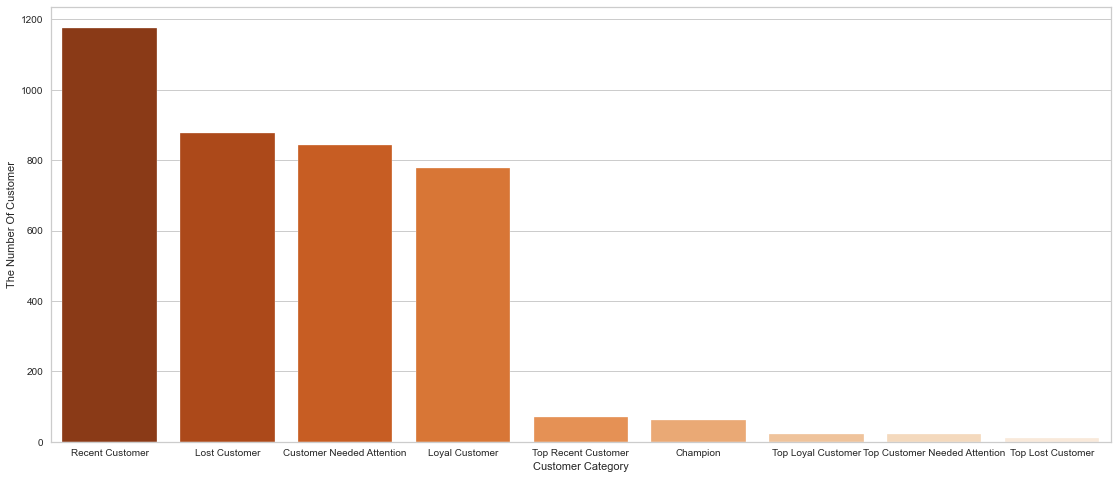

In [99]:
plt.figure(figsize=(19, 8))

sns.barplot(data=segmentation, x='Customer Category', y='The Number Of Customer', palette='Oranges_r');

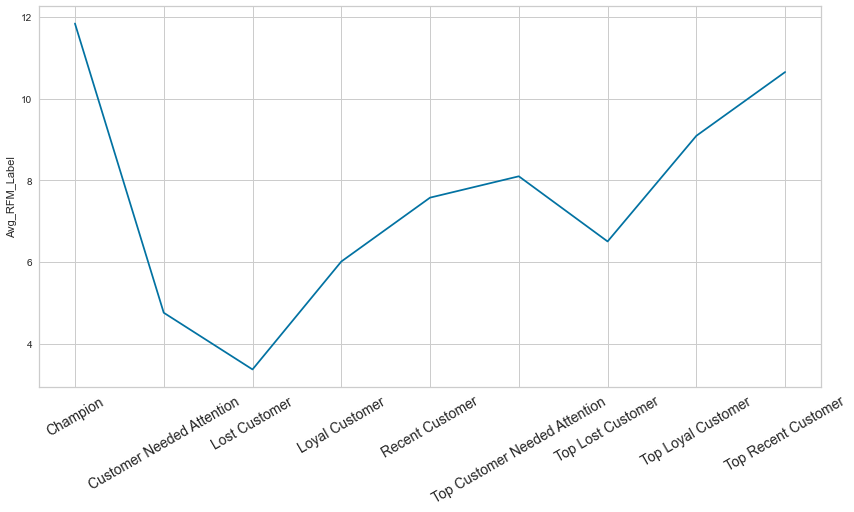

In [100]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_customer_segmentation.index, y=df_customer_segmentation.Avg_RFM_Label)
plt.xticks(rotation=30, fontsize=14);

In [101]:
# pip install squarify

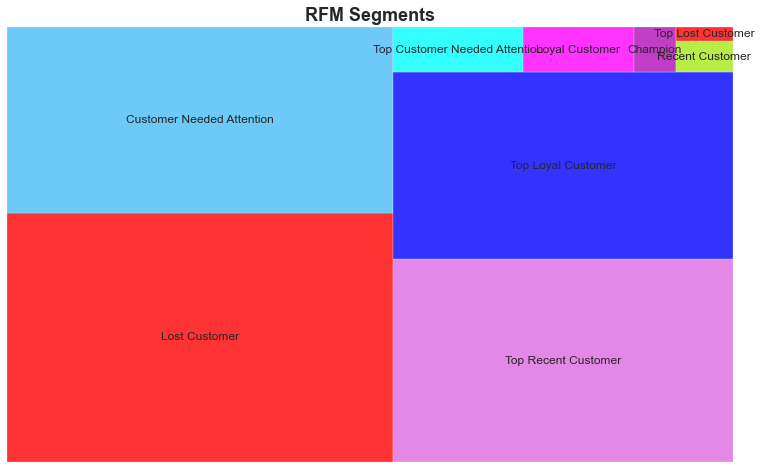

In [102]:
import squarify as sq

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
sq.plot(sizes=segmentation['The Number Of Customer'],
                      label=['Lost Customer',
                            'Customer Needed Attention',
                            'Top Recent Customer',
                            'Top Loyal Customer',
                            'Top Customer Needed Attention',
                            'Loyal Customer',
                            'Champion',
                            'Recent Customer',
                            'Top Lost Customer'],
                            alpha=0.8,
                            color=["red", "#48BCF5", "#DD6AE1", "blue", "cyan", "magenta", '#B20CB7', "#A4E919"])
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

In [103]:
# import plotly.express as px

fig = px.treemap(segmentation,
                 path=[segmentation['Customer Category']],
                 values='The Number Of Customer',
                 width=900,
                 height=600)
fig.update_layout(title="RFM Segments",
                  title_x = 0.5, title_font = dict(size=18),
                 )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()



# Pre-procerssing for Clustering

In [104]:
customer_rfm = customer_rfm.drop(['Recency_Score','Frequency_Score','Monetary_Score','Customer_RFM_Score','RFM_Label', 'Customer_Category'],axis=1)
customer_rfm.head()

,Recency,Frequency,Monetary
customerid,,,
12346.00,325,1,77183.60
12747.00,2,10,658.89
12748.00,0,195,3739.23
12749.00,3,5,98.35
12820.00,3,4,58.20


In [105]:
customer_rfm.head()

,Recency,Frequency,Monetary
customerid,,,
12346.00,325,1,77183.60
12747.00,2,10,658.89
12748.00,0,195,3739.23
12749.00,3,5,98.35
12820.00,3,4,58.20


In [106]:
customer_rfm.corr()

,Recency,Frequency,Monetary
Recency,1.00,-0.28,-0.03
Frequency,-0.28,1.00,0.16
Monetary,-0.03,0.16,1.00


<AxesSubplot:>

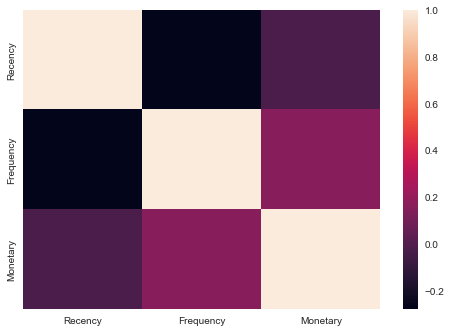

In [107]:
sns.heatmap(customer_rfm.corr())

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

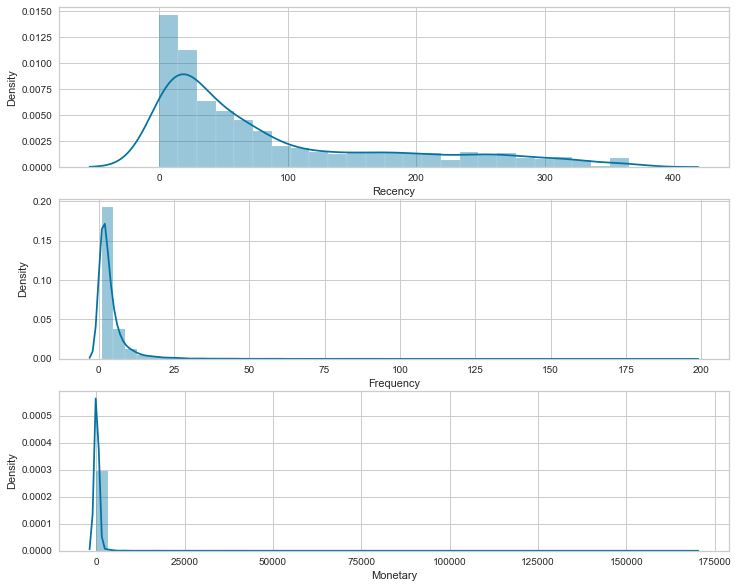

In [108]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(customer_rfm['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(customer_rfm['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(customer_rfm['Monetary'])

In [109]:
customer_rfm.describe()

,Recency,Frequency,Monetary
count,3862.00,3862.00,3862.00
mean,87.56,4.15,288.38
std,94.19,6.93,3266.99
min,0.00,1.00,0.39
25%,17.00,1.00,17.40
50%,49.00,2.00,45.00
75%,134.00,5.00,121.62
max,365.00,195.00,168471.25


In [110]:
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(customer_rfm)
rfm_trans = pd.DataFrame(trans, columns =customer_rfm.columns )

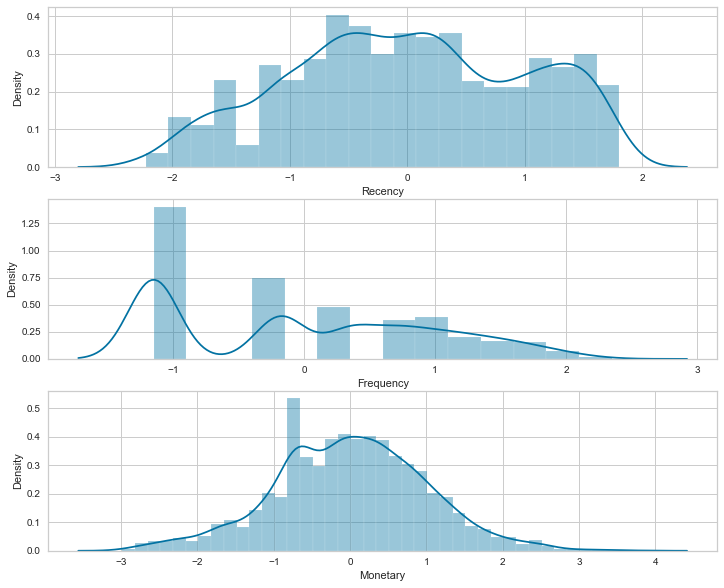

In [111]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm_trans['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm_trans['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm_trans['Monetary'])

# Show the plot
plt.show()

In [112]:
scaler = StandardScaler()
scaler.fit(rfm_trans)

#Store it separately for clustering
rfm_scaled = scaler.transform(rfm_trans)

In [113]:
data_scaled = pd.DataFrame(data=rfm_scaled, index=customer_rfm.index, columns=customer_rfm.columns)

In [114]:
data_scaled

,Recency,Frequency,Monetary
customerid,,,
12346.00,1.68,-1.15,3.60
12747.00,-1.74,1.49,1.64
12748.00,-2.22,2.35,2.47
12749.00,-1.59,0.91,0.53
12820.00,-1.59,0.68,0.18
...,...,...,...
18280.00,1.52,-1.15,-0.45
18281.00,1.10,-1.15,-1.59
18282.00,-1.22,-0.18,-0.11


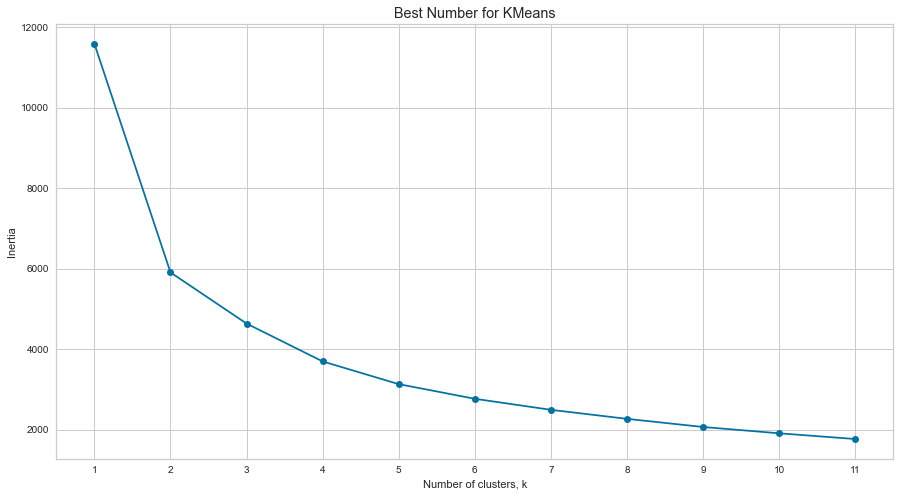

In [115]:
#First : Get the Best KMeans
ks = range(1, 12)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k, random_state=42)
    kc.fit(data_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

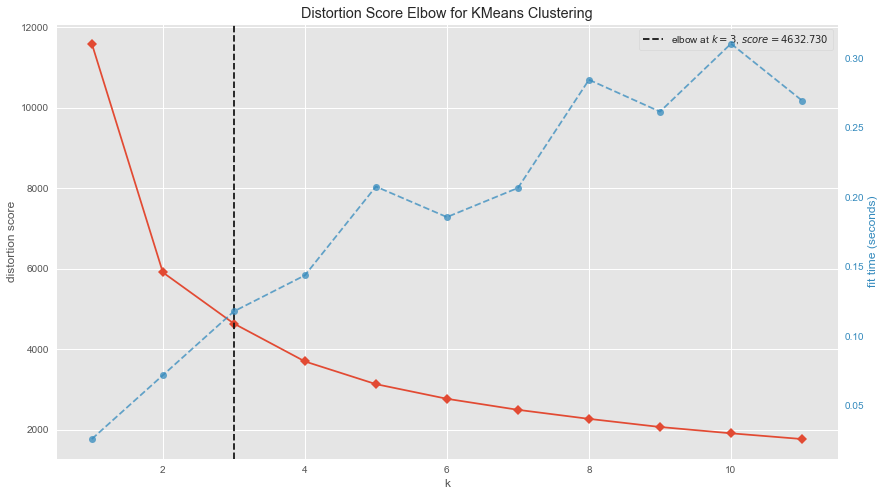

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
plt.rcParams['figure.facecolor'] = 'white'
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 12))

plt.figure(figsize=(14, 8))
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()

In [117]:
K = range(2, 12)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(data_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.40879512898555465
Silhouette Score for 3 clusters: 0.3115258749682641
Silhouette Score for 4 clusters: 0.3172648708003418
Silhouette Score for 5 clusters: 0.304653252020483
Silhouette Score for 6 clusters: 0.2959113618085664
Silhouette Score for 7 clusters: 0.3109888383573174
Silhouette Score for 8 clusters: 0.30480562433043407
Silhouette Score for 9 clusters: 0.31078385329783215
Silhouette Score for 10 clusters: 0.3070008303321254
Silhouette Score for 11 clusters: 0.3073659853086819


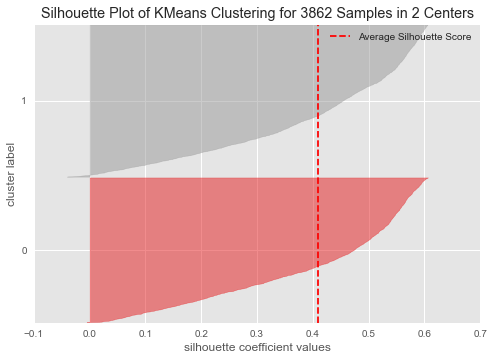

In [118]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_2 = KMeans(n_clusters=2, random_state=42)
visualizer = SilhouetteVisualizer(model_2)

visualizer.fit(data_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [119]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    '''
    Implement k-means clustering on dataset

    INPUT:
        normalised_df_rfm : dataframe. Normalised rfm dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        original_df_rfm : dataframe. Original rfm dataset to assign the labels to.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

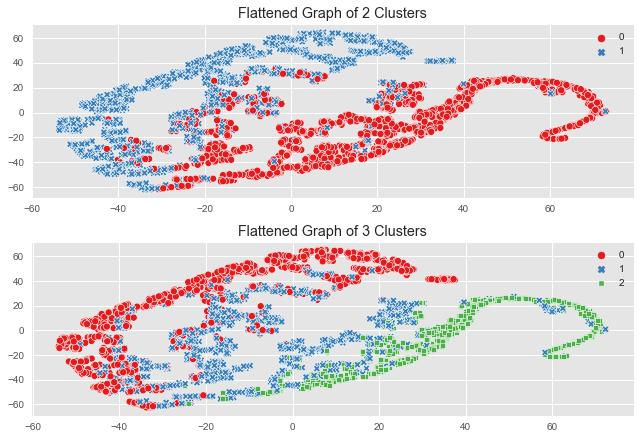

In [120]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k2 = kmeans(data_scaled, 2, customer_rfm)

plt.subplot(3, 1, 2)
df_rfm_k3 = kmeans(data_scaled, 3, customer_rfm)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

In [121]:
def rfm_values(df):
    '''
    Calcualte average RFM values and size for each cluster

    '''
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new

In [122]:
rfm_values(df_rfm_k2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         34.00      7.00   555.00  1881
1        138.00      1.00    35.00  1981

In [123]:
rfm_values(df_rfm_k3)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0        153.00      1.00    21.00  1429
1         73.00      3.00   156.00  1414
2         17.00     10.00   847.00  1019

In [124]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    '''
    Transform dataframe and plot snakeplot
    '''
    # Transform df_normal as df and add cluster column
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm,
                                       index=df_rfm_original.index,
                                       columns=df_rfm_original.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(),
                        id_vars=['customerid', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'],
                        var_name='Metric',
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

    return

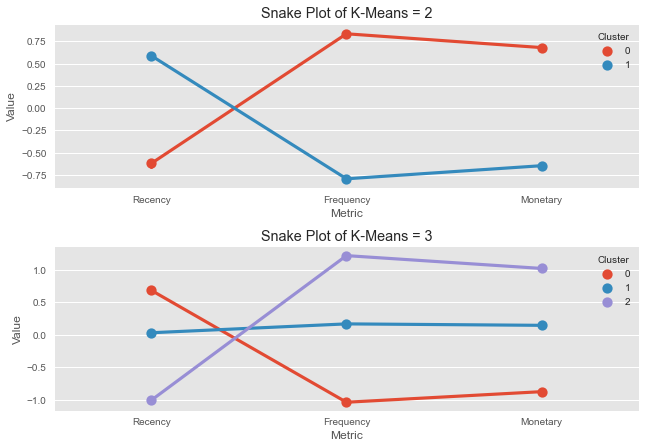

In [125]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 2')
snake_plot(data_scaled, df_rfm_k2, customer_rfm)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 3')
snake_plot(data_scaled, df_rfm_k3, customer_rfm)

plt.tight_layout()